**Import libraries**

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ignore TensorFlow info messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'



**Load MNIST dataset**

In [12]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# --- Normalize data ---
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Keep images as 28x28x1 for CNN / demo.ipynb compatibility
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)


x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


**Build model**

In [13]:


model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile model**

In [14]:


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



**Train model**

In [15]:

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8789 - loss: 0.3993 - val_accuracy: 0.9762 - val_loss: 0.0813
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9820 - loss: 0.0578 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9882 - val_loss: 0.0424
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9885 - val_loss: 0.0389



**Evaluate on test set**

In [16]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0410
Test Accuracy: 0.9889


**Visualize test predictions**

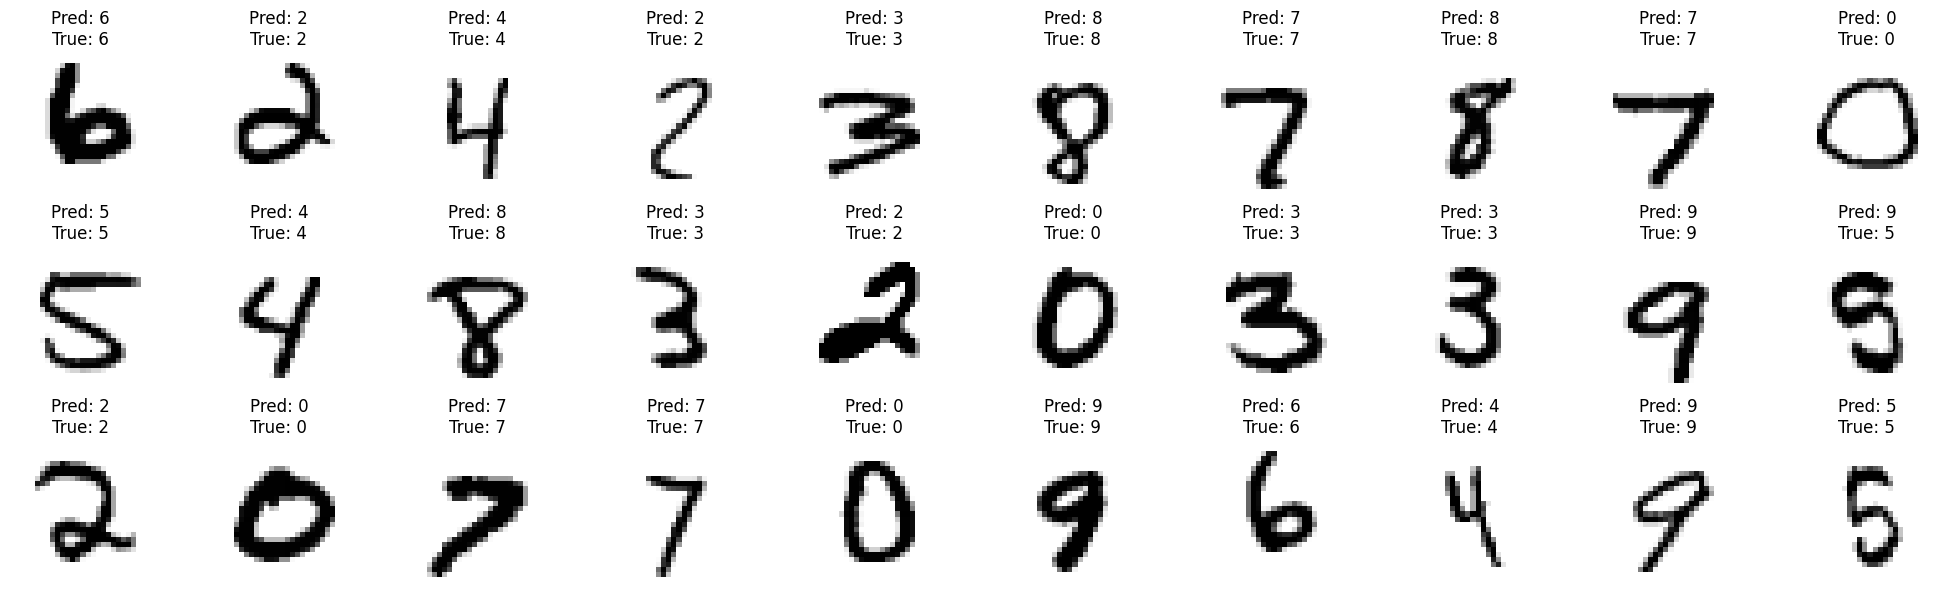

In [17]:

rows, cols = 3, 10
plt.figure(figsize=(20,6))
for i in range(rows*cols):
    idx = random.randint(0, x_test.shape[0]-1)
    img = x_test[idx].reshape(28,28)
    pred = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap='gray_r')
    plt.title(f"Pred: {pred}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**test individual images**

In [18]:



def test_single(idx):
    img = x_test[idx]
    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"True label: {y_test[idx]}", color='g')

    preds = model.predict(img.reshape(1,28,28,1), verbose=0)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))
    color = 'b' if pred_class == y_test[idx] else 'r'
    plt.xlabel(f"Prediction = {pred_class} (Confidence = {confidence:.2f})", color=color)
    plt.show()


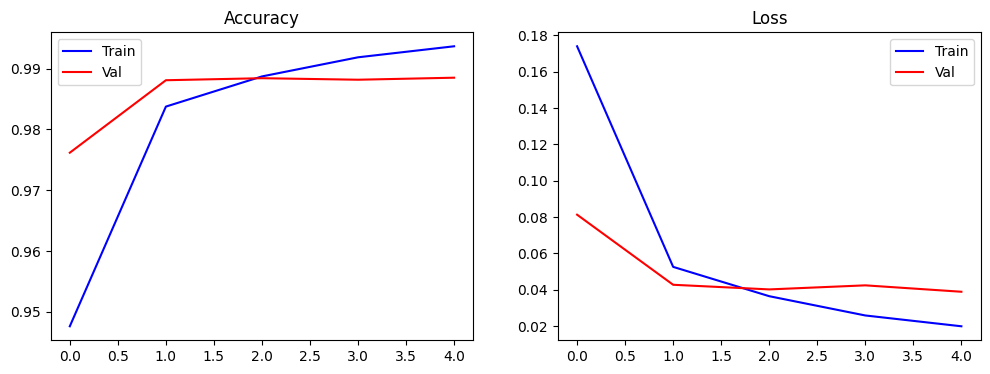

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],'b-',label='Train')
plt.plot(history.history['val_accuracy'],'r-',label='Val')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],'b-',label='Train')
plt.plot(history.history['val_loss'],'r-',label='Val')
plt.title("Loss"); plt.legend()
plt.show()

Test Accuracy: 0.9894, Loss: 0.0328
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


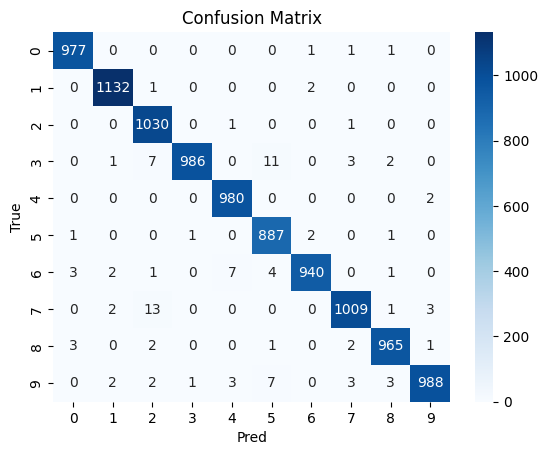

In [ ]:
best_model = keras.models.load_model('mnist_model.keras')
loss, acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Confusion matrix
y_pred = np.argmax(best_model.predict(x_test),axis=1)
# The true labels are already in the correct format (not one-hot encoded)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Pred"); plt.ylabel("True")
plt.show()

**Run tests on specific indices**

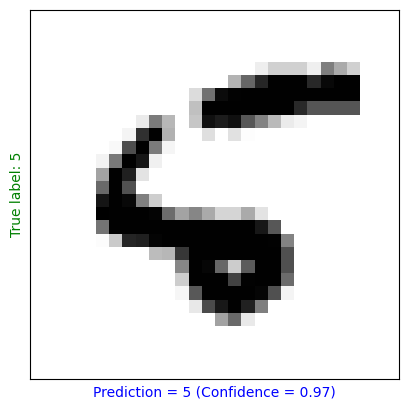

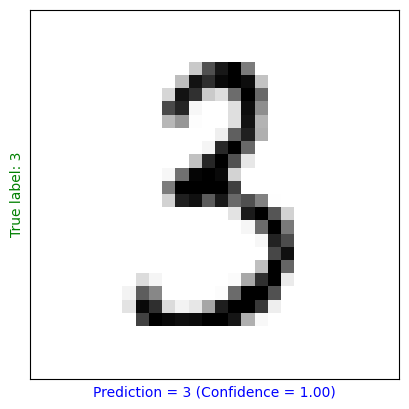

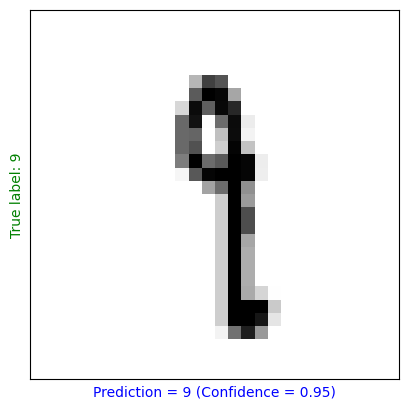

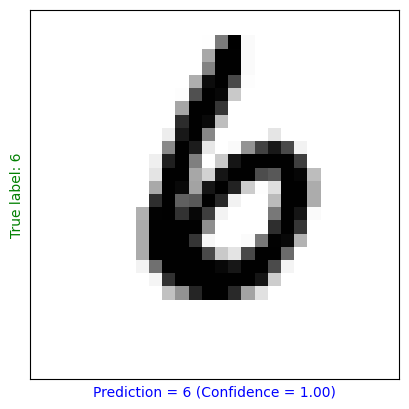

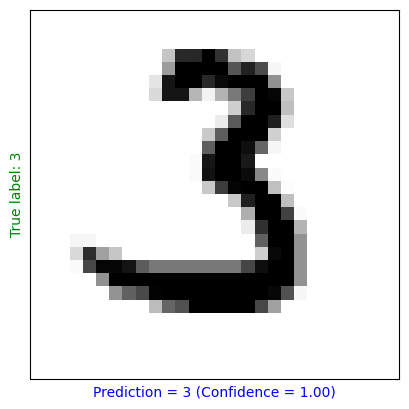

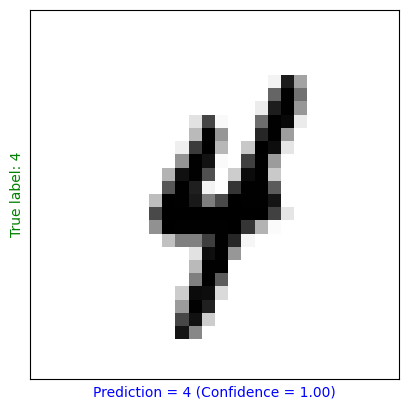

In [21]:

for idx in [8, 76, 4500, 2156, 9156, 6999]:
    test_single(idx)


**Save model**

In [22]:


model.save('mnist_model.keras')
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras
